# Analysing the dataset of the given supermaket

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# importing datasets
data=pd.read_csv(r"C:\Users\HP\SampleSuperstore.csv")
data


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.info() # searching for null values or other inconsistencies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


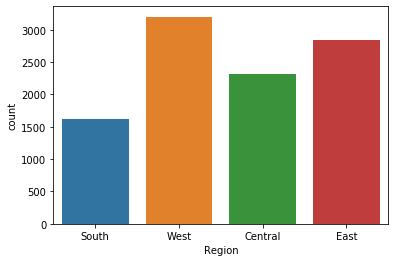

In [4]:
sns.countplot(x="Region",data=data)# region where the sale is most

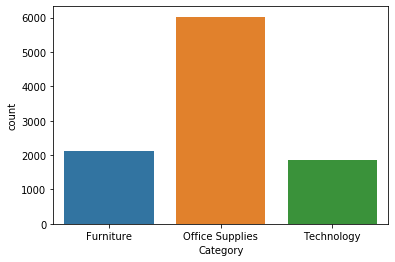

In [5]:
sns.countplot(x="Category",data=data ) # selling of the item which is most

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

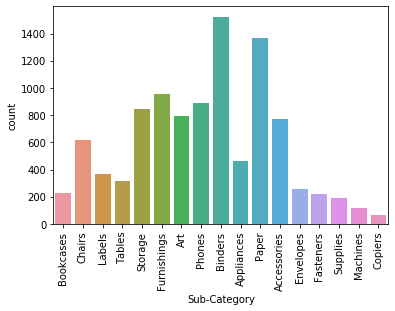

In [6]:
sns.countplot(x="Sub-Category",data=data)
plt.xticks(rotation=90)

In [7]:
# counting types of customers
data.Segment.value_counts(normalize=False)

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

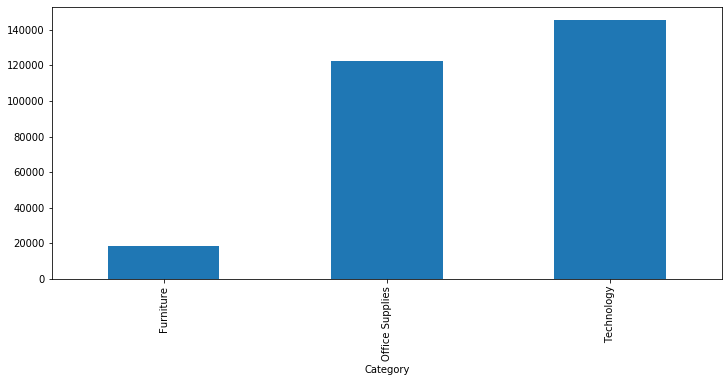

In [8]:
data.groupby("Category").sum()['Profit'].sort_values(ascending=True).plot.bar(figsize=(12,5))
plt.show()# profit made in category section

# eventhough office supplies had more sales but more profit where made in technology sector

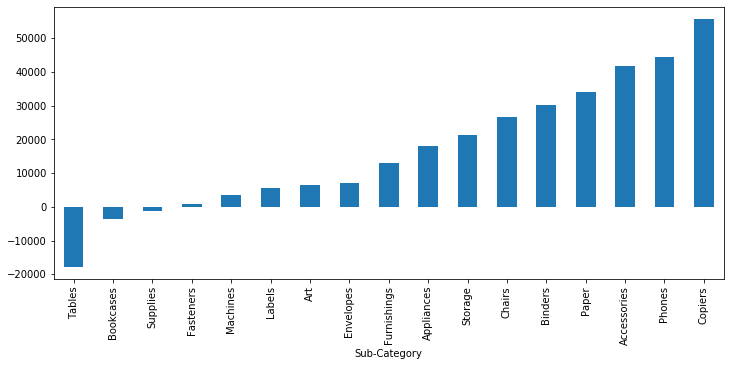

In [9]:
data.groupby("Sub-Category").sum()['Profit'].sort_values(ascending=True).plot.bar(figsize=(12,5))
plt.show()   # profit made in the su-category section

### from the above dataset we can state that there are category such as tables and bookcases where the company is facing loss, and also the  above dataset gives us a basic insight upon which category does the companies make properties

In [15]:
pd.DataFrame(data.groupby('City').sum()['Profit'].sort_values(ascending=True).head(20))

,Profit
City,
Philadelphia,-13837.7674
Houston,-10153.5485
San Antonio,-7299.0502
Lancaster,-7239.0684
Chicago,-6654.5688
Burlington,-3622.8772
Dallas,-2846.5257
Phoenix,-2790.8832
Aurora,-2691.7386


In [29]:
pd.DataFrame(data.groupby('State').sum())['Profit'].sort_values(ascending=True)

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


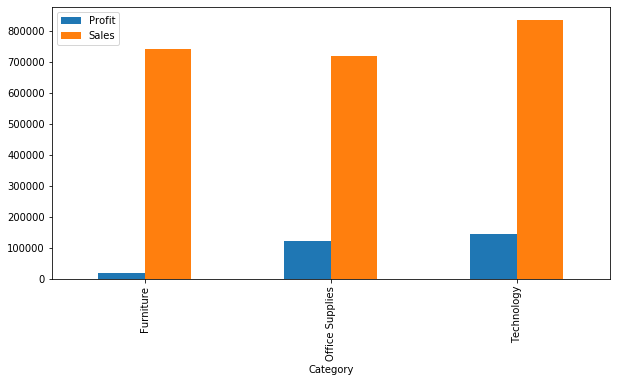

In [23]:
# making a chart for sales and profit based on category
data.groupby('Category')['Profit','Sales'].sum().plot.bar(figsize=(10,5))
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


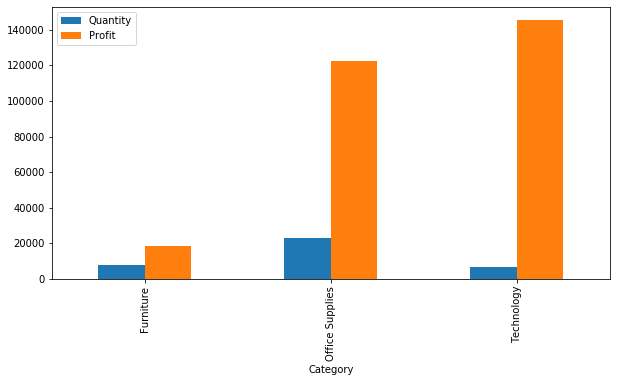

In [24]:
# a graph for quantity and profit
data.groupby("Category")['Quantity','Profit'].sum().plot.bar(figsize=(10,5))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


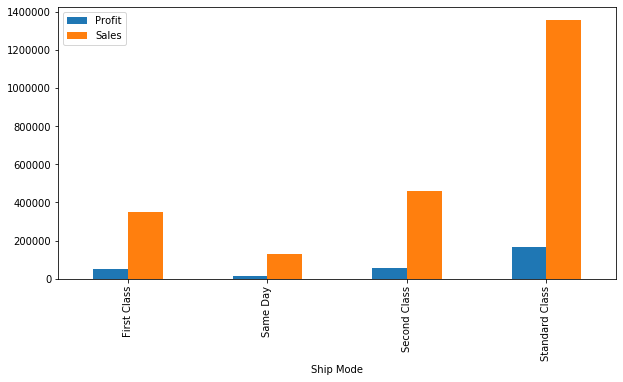

In [25]:
# a graph for profit and sale on basis of Shipping mode
data.groupby('Ship Mode')['Profit','Sales'].sum().plot.bar(figsize=(10,5))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


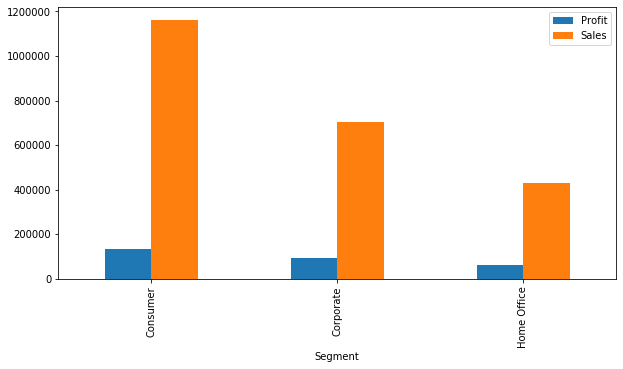

In [30]:
# profit and sales based on segment
data.groupby("Segment")['Profit','Sales'].sum().plot.bar(figsize=(10,5))

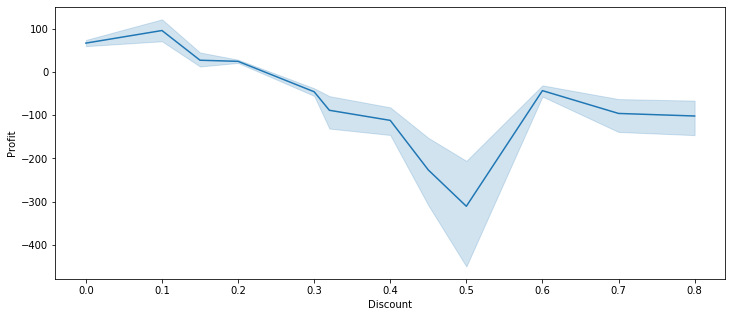

In [28]:
plt.figure(figsize=(12,5))
sns.lineplot("Discount","Profit",data=data)
plt.show()

# so we can conclude that as discount increases the profit decreases

# from the given analysis done we could exploration done we can find upon what different criterias the company can invest in more and enhance there productivity. also they can find out there profit estimate better